CSV generated on databricks notebook `#232437` on Nov 27

In [40]:
import pandas as pd
%matplotlib inline

In [21]:
df = pd.read_csv('disconnect_scripts.csv')
df.head()

,script_url_stemmed,script_url_domain,filter,regex
0,cdn.justuno.com/mwgt_4.1.js,justuno.com,||justuno.com/*mwgt_4.1.js^,justuno.com/.+mwgt_4.1.js
1,h.online-metrix.net/fp/check.js,online-metrix.net,||online-metrix.net/*check.js^,online-metrix.net/.+check.js
2,sonar.semantiqo.com/c83ul/checking.js,semantiqo.com,||semantiqo.com/*checking.js^,semantiqo.com/.+checking.js
3,ismatlab.com/cp/public/js/cp.js,ismatlab.com,||ismatlab.com/*cp.js^,ismatlab.com/.+cp.js
4,static-login.sendpulse.com/apps/fc3/build/dh-l...,sendpulse.com,||sendpulse.com/*dh-libs.js^,sendpulse.com/.+dh-libs.js


In [22]:
df.script_url_domain.nunique()

80

In [23]:
df['filter'].nunique()

487

This all matches with databricks notebook.

In [24]:
lines = []
lines.append('! Title: Fingerprinting Script Filters')
lines.append('! Description: Scripts to block')
lines.append('! Expires: 100 days')
lines.extend(sorted(df['filter'].unique()))

with open('../src/treatmentScript/assets/script_list.txt', 'w') as f:
    f.write('\n'.join(lines))

# Full domain block those that appear to be randomizing path

In [51]:
high_count = (
    df[['script_url_domain', 'filter']]
    .drop_duplicates()
    .groupby('script_url_domain')
    .count()
    .sort_values(by='filter', ascending=False)
)

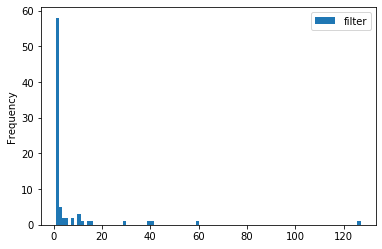

In [52]:
high_count.plot.hist(bins=100)

In [98]:
over_two = high_count[high_count['filter'] > 2]
len(over_two)

22

In [99]:
for i in over_two.index.values:
    print('----------------', i)
    print(list(df[df.script_url_domain == i]['filter'].unique()))

---------------- bitmedia.io
['||bitmedia.io/*5a0ad92bfc42f6001cb51175^', '||bitmedia.io/*59b999c98995730020ff8a69^', '||bitmedia.io/*5bd2b4ba474087000feabf79^', '||bitmedia.io/*5be4ce375a351c16d91fc251^', '||bitmedia.io/*5a596516c4576d001cbce1e3^', '||bitmedia.io/*5a9964197fcae8000f6245fa^', '||bitmedia.io/*5b6494070c5ad50010dd2a1e^', '||bitmedia.io/*5b6ad76e0721410010b0b212^', '||bitmedia.io/*5a5964c8c4576d001cbce1c6^', '||bitmedia.io/*5b1ec3a2277c7a001055c490^', '||bitmedia.io/*54e1aafd45200a6669f6ddc6^', '||bitmedia.io/*59984631f19090002025f971^', '||bitmedia.io/*5a0ada46fc42f6001cb511c0^', '||bitmedia.io/*5bff2adbf94159078cfe72bf^', '||bitmedia.io/*5bfcf291e633f21865159b7c^', '||bitmedia.io/*57e4fdf37056922c667bec93^', '||bitmedia.io/*5a0ad9dffc42f6001cb51180^', '||bitmedia.io/*5bff2b02f9415990cdfe72c8^', '||bitmedia.io/*5c29d9151cea37070ac280df^', '||bitmedia.io/*59a3e73d256cda0021718231^', '||bitmedia.io/*583276a41e87c40008f3e881^', '||bitmedia.io/*5ac0079e2e08e60010dfd6f7^', '|

Exceptions:

* provers.pro (3)
* fuelx.com (2)
* viral-loops.com (3)
* carts.guru (4)
* opolen.com.br(5)
* pixlee.com (5)

In [111]:
# Ensure I've typed out the exceptions correctly
high_exceptions = [
    'provers.pro', 
    'fuelx.com', 
    'viral-loops.com', 
    'carts.guru', 
    'opolen.com.br', 
    'pixlee.com',
    'appcast.io', # appcast.io/pixels/*.js
    'adnium.com', # adnium.com/warp/* and adnium.com/imvideo/*
    'bitmedia.io', # Handcraft better bitmedia.io/js/adbybm.js/*
    'doubleverify.com',  # Handcraft better cdn.doubleverify.com/dv*.js cdn.doubleverify.com/bsredirect*.js
    'pinpoll.com', # Handcraft better pinpoll.com/assets/js/embed/embed-*.js
    'c3tag.com', # Handcraft better c3tag.com/*c3metrics*
    'xcvgdf.party', # Handcraft better - xcvgdf.party/lhzbsrfkjf/js/*
    'rollick.io', # widget.rollick.io/*
]
for exception in high_exceptions:
    assert exception in high_count.index.values, exception

In [112]:
domains_to_full_domain_block = set(over_two.index) - set(high_exceptions)
domains_to_full_domain_block

{'bgclck.me',
 'clickguard.com',
 'hilltopads.net',
 'mystighty.info',
 'psonstrentie.info',
 'shoporielder.pro',
 'sweeterge.info',
 'wrethicap.info'}

In [113]:
lines = []
lines.append('! Title: Fingerprinting Script Filters')
lines.append('! Description: Scripts to block')
lines.append('! Expires: 100 days')
lines.extend(sorted(df['filter'].unique()))
lines.extend([f'||{domain}^' for domain in domains_to_full_domain_block])
# Hand crafted refinements
lines.extend([
    '||appcast.io/pixels/*.js^',
    '||adnium.com/warp/*^',
    '||adnium.com/imvideo/*^',
    '||bitmedia.io/js/adbybm.js/*^',
    '||doubleverify.com/dv*.js^',
    '||doubleverify.com/bsredirect*.js^',
    '||pinpoll.com/assets/js/embed/embed-*.js^',
    '||c3tag.com/*c3metrics*^',
    '||xcvgdf.party/*/js/*^',
    '||widget.rollick.io/*^'
])

with open('../src/treatmentScript/assets/script_list.txt', 'w') as f:
    f.write('\n'.join(lines))